In [ ]:
import sklearn
import cv2
import os
import pickle
import math
import sys
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install mne
import mne
import pandas as pd
!pip install neupy
import neupy
from sklearn.cluster import KMeans
from neupy import algorithms
import seaborn as sns
from scipy.signal import find_peaks
from mne.utils import logger, verbose
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/s01.dat', 'rb') as file: x = pickle.load(file, encoding='latin1')
data_ = x['data']
eeg_data=data_[:,0:32,:]
print(eeg_data.shape)

(40, 32, 8064)


[3.1462183  4.30571133 3.87961619 ... 3.18765695 4.04046104 4.35953958]


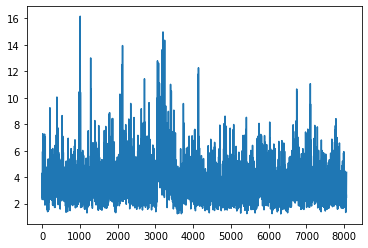

In [ ]:
#gfp calculation
gfp=[]
for video in range(40):
  RMSE_array=[]
  for i in range(len(eeg_data[0][0])):
    v_mean=0
    for j in range(len(eeg_data[0])):
      v_mean=v_mean+eeg_data[video,j,i]
    v_mean=v_mean/len(eeg_data[0])
    squared_error=0
    for j in range(len(eeg_data[0])):
      squared_error=squared_error+(eeg_data[video,j,i]-v_mean)**2
    RMSE=math.sqrt(squared_error/len(eeg_data[0]))
    RMSE_array.append(RMSE)
  #print(len(RMSE_array))
  gfp.append(RMSE_array)
gfp=np.array(gfp)
#print(gfp.shape)
gfp=gfp[0]
gfp=np.transpose(gfp)
print(gfp)
plt.plot([i for i in range(8064)], gfp)

In [ ]:
Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2 = eeg_data[0][:, 1]
col = ['Fp1','AF3','F3','F7','FC5','FC1','C3','T7','CP5','CP1','P3','P7','PO3','O1','Oz','Pz','Fp2','AF4','Fz','F4','F8','FC6','FC2','Cz','C4','T8','CP6','CP2','P4','P8','PO4','O2']
m = [[0, 0, 0, Fp1, 0, Fp2, 0 , 0, 0],
    [0, 0, 0, AF3, 0, AF4, 0, 0, 0],
    [F7, 0, F3, 0, Fz, 0, F4, 0, F8],
    [0, FC5, 0, FC1, 0, FC2, 0, FC6, 0],
    [T7, 0, C3, 0, Cz, 0, C4, 0, T8],
    [0, CP5, 0, CP1, 0, CP2, 0, CP6, 0],
    [P7, 0, P3, 0, Pz, 0, P4, 0, P8],
    [0, 0, 0, PO3, 0, PO4, 0, 0, 0],
    [0, 0, 0, O1, Oz, O2, 0, 0, 0]]

info = np.array([[i, j] for i in range(9) for j in range(9) if m[i][j] != 0])

In [ ]:
eeg_data=data_[0,0:32,:]

In [ ]:
def _corr_vectors(A, B, axis=0):
    """Compute pairwise correlation of multiple pairs of vectors.
    Fast way to compute correlation of multiple pairs of vectors without
    computing all pairs as would with corr(A,B). Borrowed from Oli at Stack
    overflow. Note the resulting coefficients vary slightly from the ones
    obtained from corr due differences in the order of the calculations.
    (Differences are of a magnitude of 1e-9 to 1e-17 depending of the tested
    data).
    Parameters
    ----------
    A : ndarray, shape (n, m)
        The first collection of vectors
    B : ndarray, shape (n, m)
        The second collection of vectors
    axis : int
        The axis that contains the elements of each vector. Defaults to 0.
    Returns
    -------
    corr : ndarray, shape (m,)
        For each pair of vectors, the correlation between them.
    """
    An = A - np.mean(A, axis=axis)
    Bn = B - np.mean(B, axis=axis)
    An /= np.linalg.norm(An, axis=axis)
    Bn /= np.linalg.norm(Bn, axis=axis)
    return np.sum(An * Bn, axis=axis)

In [ ]:
def plot_maps(maps, info):
    """Plot prototypical microstate maps.
    Parameters
    ----------
    maps : ndarray, shape (n_channels, n_maps)
        The prototypical microstate maps.
    info : instance of mne.io.Info
        The info structure of the dataset, containing the location of the
        sensors.
    """
    for i, map in enumerate(maps):
        plt.figure(figsize=(10,10))
        plt.subplot(1, len(maps), i + 1)
        mne.viz.plot_topomap(map, info)
        #plt.title('%d' % i)

In [ ]:
def locmax(x):
    """Get local maxima of 1D-array
    Args:
        x: numeric sequence
    Returns:
        m: list, 1D-indices of local maxima
    """

    dx = np.diff(x) # discrete 1st derivative
    zc = np.diff(np.sign(dx)) # zero-crossings of dx
    m = 1 + np.where(zc == -2)[0] # indices of local max.
    return m

epoch:  0
0.5946356170638426
epoch:  1
0.5946356170638426
epoch:  2
0.5946356170638426
epoch:  3
0.5948119994888381
epoch:  4
0.5960285620375723
epoch:  5
0.5960285620375723
epoch:  6
0.6024680423864588
epoch:  7
0.6024680423864588
epoch:  8
0.6024680423864588
epoch:  9
0.6024680423864588
epoch:  10
0.6024680423864588
epoch:  11
0.6036285948478511
epoch:  12
0.6036285948478511
epoch:  13
0.6066036970815065
epoch:  14
0.6066036970815065
epoch:  15
0.6067913426146522
epoch:  16
0.6067913426146522
epoch:  17
0.6094910632552288
epoch:  18
0.6094910632552288
epoch:  19
0.6094910632552288
epoch:  20
0.6094910632552288
epoch:  21
0.6094910632552288
epoch:  22
0.6094910632552288
epoch:  23
0.6094910632552288
epoch:  24
0.6094910632552288
epoch:  25
0.6094910632552288
epoch:  26
0.6094910632552288
epoch:  27
0.6094910632552288
epoch:  28
0.6094910632552288
epoch:  29
0.6094910632552288
epoch:  30
0.6094910632552288
epoch:  31
0.6094910632552288
epoch:  32
0.6094910632552288
epoch:  33
0.6094910

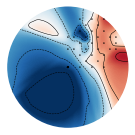

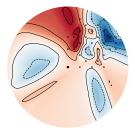

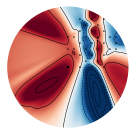

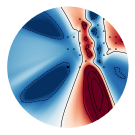

In [ ]:
peaks = locmax(gfp)
eeg_data1=eeg_data.T
ip_eeg=eeg_data[:,peaks]
ip_eeg1=ip_eeg.T
learn_rate=0.24


minValue = np.amin(ip_eeg)
maxValue=np.amax(ip_eeg)
for op in range(4,5):
  wt=np.random.randint(minValue,maxValue,size=(32,op))
  wt=wt.astype(np.float)

  t=1
  gev=0
  total_epochs=200
  delta=0.12
  for epochs in range(total_epochs):
    print("epoch: ",epochs)
    for ele in range(peaks.size):
      d=[]
      for i in range(op):
        temp=0
        for j in range(32):
          temp+=(wt[j][i]-ip_eeg1[ele][j])**2   
        temp=math.sqrt(temp)
        d.append(temp)
      d=np.array(d)
      dmin=np.argmin(d)
      wt1=wt
      sigma_t = 1*math.exp(-1*t/(total_epochs*peaks.size))
      for k in range(32):
        wt1[k][dmin]=wt[k][dmin]+learn_rate/(1+(delta*(epochs+1)))*(ip_eeg1[ele][k]-wt[k][dmin])*math.exp(-1*dmin*dmin/(2*(sigma_t*sigma_t)))
      sofm_maps=wt1.T
      t=t+1
      sofm_maps /= np.linalg.norm(sofm_maps, axis=1, keepdims=True) 

      gfp_sum_sq=np.sum(gfp**2)
      activation=sofm_maps.dot(eeg_data)
      seg=np.argmax(np.abs(activation),axis=0)
      map_corr=_corr_vectors(eeg_data,sofm_maps[seg].T)
      gev_sofm=sum((gfp*map_corr)**2)/gfp_sum_sq
      if((gev<gev_sofm)):
        wt=wt1
        gev=gev_sofm    
        seg_final=seg
        maps=sofm_maps
    print(gev)
  print('')
  print('')
  print("GEV for ",op," clusters: ",gev)
  plot_maps(maps,info)


In [ ]:
np.set_printoptions(threshold=sys.maxsize)
print(seg)